<a href="https://colab.research.google.com/github/rajdeepbanerjee-git/JNCLectures_Intro_to_ML/blob/main/Week2/EDA_EU_salaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [6]:
# Load the dataset
path = "/content/IT Salary Survey EU  2020.csv"
data = pd.read_csv(path)

# get basic info like # of observations, data type, non-null value counts, etc.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 23 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                   --------------  -----  
 0   Timestamp                                                                                                                1253 non-null   object 
 1   Age                                                                                                                      1226 non-null   float64
 2   Gender                                                                                                                   1243 non-null   object 
 3   City                                                                                                                     1253 non-null   o

In [7]:
data.head() # takes top 5 rows from the data

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN


In [8]:
 name_maps = {"Yearly brutto salary (without bonus and stocks) in EUR": "salary_wo_bonus_stocks"}
 data.rename(columns = name_maps, inplace = True)
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 23 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                   --------------  -----  
 0   Timestamp                                                                                                                1253 non-null   object 
 1   Age                                                                                                                      1226 non-null   float64
 2   Gender                                                                                                                   1243 non-null   object 
 3   City                                                                                                                     1253 non-null   o

In [9]:
column_to_examine = data["salary_wo_bonus_stocks"]
type(column_to_examine)

pandas.core.series.Series

In [10]:
# univariate stats
column_to_examine.describe()

count    1.253000e+03
mean     8.027904e+07
std      2.825061e+09
min      1.000100e+04
25%      5.880000e+04
50%      7.000000e+04
75%      8.000000e+04
max      1.000000e+11
Name: salary_wo_bonus_stocks, dtype: float64

In [11]:
# quartiles and deciles
quartiles = [0., 0.25, 0.5, 0.75, 1.0]
deciles = [i/10 for i in range(11)]
print(column_to_examine.quantile(quartiles),
      column_to_examine.quantile(deciles))


0.00    1.000100e+04
0.25    5.880000e+04
0.50    7.000000e+04
0.75    8.000000e+04
1.00    1.000000e+11
Name: salary_wo_bonus_stocks, dtype: float64 0.0    1.000100e+04
0.1    4.800000e+04
0.2    5.500000e+04
0.3    6.000000e+04
0.4    6.500000e+04
0.5    7.000000e+04
0.6    7.300000e+04
0.7    7.800000e+04
0.8    8.500000e+04
0.9    9.500000e+04
1.0    1.000000e+11
Name: salary_wo_bonus_stocks, dtype: float64


In [12]:
# IQR and whiskers

def calc_iqr_whiskers(data):
  ''' Expects data in pandas series format '''

  q1 = data.quantile(0.25)
  q3 = data.quantile(0.75)
  IQR = q3 - q1
  lower_whisker = q1 - 1.5*IQR
  upper_whisker = q3 + 1.5*IQR

  return IQR, [lower_whisker, upper_whisker]


In [13]:
IQR, whiskers = calc_iqr_whiskers(column_to_examine)
print(f"Inter-quartile range for salaries: {IQR}\nLower limit: {whiskers[0]}\nUpper limt: {whiskers[1]}")

Inter-quartile range for salaries: 21200.0
Lower limit: 27000.0
Upper limt: 111800.0


#### How does salary depend on age?
1. you can just do a scatter plot and see if there is any trend
2. you can bin the age - check mean or median salary for each bin, to check some trend
3. Can calculate correlation
4. you can do ANOVA between binned age (categorical) and salary
5. you can calculate mutual information between the two

Before we start the analysis, let us do the following:
- slice the dataframe and take only these two required columns
- check for nulls
- remove rows with null values for ease of analysis ...

In [14]:
required_columns = ["Age", "salary_wo_bonus_stocks"]
data_slice = data[required_columns]
data_slice.head()

,Age,salary_wo_bonus_stocks
0,26.0,80000.0
1,26.0,80000.0
2,29.0,120000.0
3,28.0,54000.0
4,37.0,62000.0


In [15]:
# check for null values ...
data_slice.isnull().sum()

Age                       27
salary_wo_bonus_stocks     0
dtype: int64

In [16]:
# drop rows where age is null
print(f"rows before dropping nulls: {len(data_slice)}")
data_slice.dropna(axis = 0, how = 'any', inplace = True)
print(f"rows after dropping nulls: {len(data_slice)}")

rows before dropping nulls: 1253
rows after dropping nulls: 1226


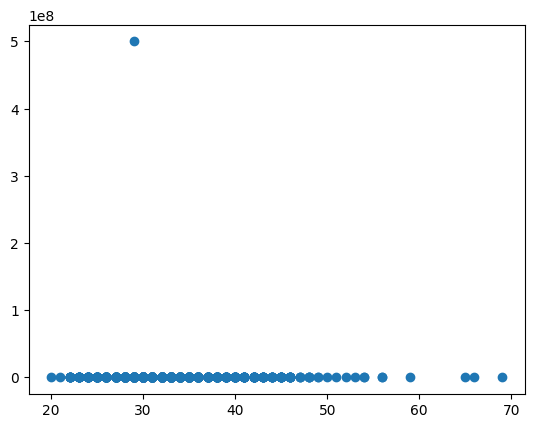

In [17]:
# scatter plot
plt.scatter(data_slice["Age"], data_slice["salary_wo_bonus_stocks"])

# can you spot the outlier?
- go back to the percentiles - do you see a big jump between 90th and 100th percentile?

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7a79e42e90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7a79e433d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7a79e42bf0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7a79e43910>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7a79e43bb0>],
 'means': []}

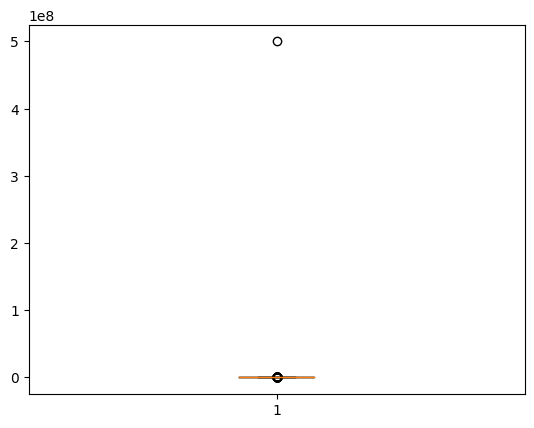

In [18]:
# you can also check the boxplot
plt.boxplot(data_slice['salary_wo_bonus_stocks'])

In [19]:
# let us remove data beyond 90th percentile - I can also cap the data to 90th percentile
quantile_limit_val = data_slice['salary_wo_bonus_stocks'].quantile(0.9)
print(f"rows before dropping nulls: {len(data_slice)}")
data_slice = data_slice[data_slice["salary_wo_bonus_stocks"] <= quantile_limit_val]
print(f"rows after dropping nulls: {len(data_slice)}")

rows before dropping nulls: 1226
rows after dropping nulls: 1114


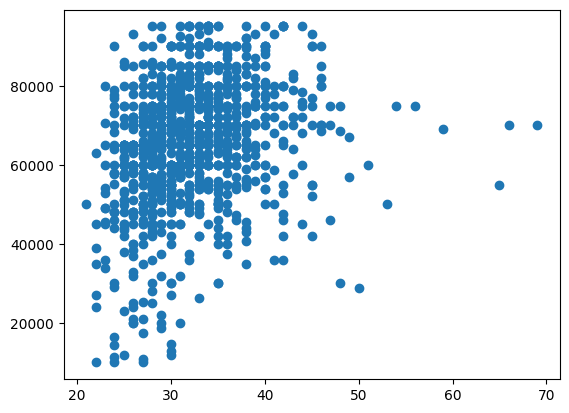

In [20]:
# let's do the plot again
# scatter plot
plt.scatter(data_slice["Age"], data_slice["salary_wo_bonus_stocks"])

#### You see, because there is always less percentage of working people beyond 50, most of the data is concentrated for age < 50

Let us now try to bin the data and see if we get a better insight from the bins ...

In [21]:
# before that, let us get an understanding of the distribution of age
data_slice["Age"].value_counts(normalize = True)*100

30.0    9.335727
32.0    7.809695
28.0    7.719928
33.0    7.271095
29.0    7.271095
31.0    7.181329
35.0    6.373429
34.0    5.834829
27.0    5.206463
26.0    5.026930
36.0    4.398564
38.0    3.680431
25.0    3.680431
37.0    3.590664
40.0    2.423698
24.0    2.423698
39.0    1.885099
42.0    1.705566
23.0    1.077199
45.0    0.897666
41.0    0.807899
46.0    0.718133
43.0    0.718133
44.0    0.718133
22.0    0.628366
48.0    0.269300
47.0    0.269300
49.0    0.179533
66.0    0.089767
56.0    0.089767
53.0    0.089767
65.0    0.089767
59.0    0.089767
50.0    0.089767
51.0    0.089767
21.0    0.089767
69.0    0.089767
54.0    0.089767
Name: Age, dtype: float64

In [22]:
bins = [20, 30, 40, 50, 60, 70]
age_groups = ['Twenties', 'Thirties', 'Forties', 'Fifties', 'Sixties']
data_slice["Age_groups"] = pd.cut(data_slice['Age'], bins=bins, labels=age_groups)

In [23]:
# let us look at the age groups distribution and see if most of the data is for age < 50
data_slice["Age_groups"].value_counts()

Thirties    562
Twenties    473
Forties      71
Fifties       5
Sixties       3
Name: Age_groups, dtype: int64

Then it is better to see trends mostly for Age < 40.
Let's calculate average and median salary for the above age groups ...

In [24]:
data_slice.groupby(["Age_groups"])["salary_wo_bonus_stocks"].mean()

Age_groups
Twenties    60223.693721
Thirties    70243.704626
Forties     69326.760563
Fifties     65800.000000
Sixties     65000.000000
Name: salary_wo_bonus_stocks, dtype: float64

In [25]:
bin_median_salaries = list(data_slice.groupby(["Age_groups"])["salary_wo_bonus_stocks"].median())

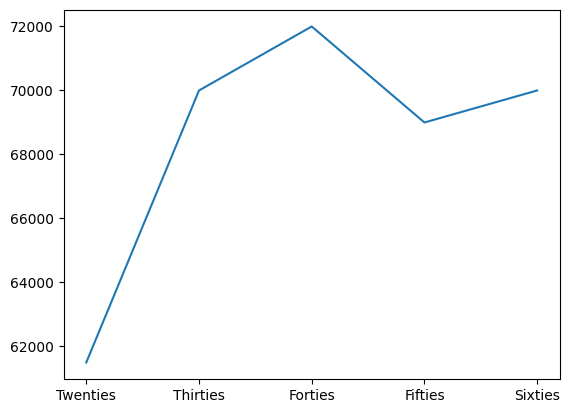

In [26]:
plt.plot(age_groups, bin_median_salaries)

In [27]:
# If you just look at correlation, it is not that high because of the data in age > 40
data_slice["Age"].corr(data_slice["salary_wo_bonus_stocks"])

0.2651216665466438

In [28]:
# but if you look at data up to age 40 ...

test = data_slice[data_slice["Age"] <= 40]
test["Age"].corr(test["salary_wo_bonus_stocks"])

0.34441411489974105

Another part is that correlation only looks at the linear relationship - according to the above plot it is not exactly linear!

In [43]:
#data_slice.head()
test_df = data_slice.pivot(columns='Age_groups', values = 'salary_wo_bonus_stocks')
test_df.head()

Age_groups,Twenties,Thirties,Forties,Fifties,Sixties
0,80000.0,NaN,NaN,NaN,NaN
1,80000.0,NaN,NaN,NaN,NaN
3,54000.0,NaN,NaN,NaN,NaN
4,NaN,62000.0,NaN,NaN,NaN
5,NaN,76000.0,NaN,NaN,NaN


In [48]:
# calculate f-score and p-value using one-way ANOVA:
import scipy.stats as stats

fvalue, pvalue = stats.f_oneway(
    test_df['Twenties'].dropna(),
    test_df['Thirties'].dropna(),
    test_df['Forties'].dropna(),
    #test_df['Fifties'].dropna(),
    #test_df['Sixties'].dropna()
    )
print(f"fvalue: {fvalue}, pvalue: {pvalue}")

fvalue: 59.3392919977305, pvalue: 3.3391140015456882e-25



- p-value for forties, fifties and sixties: 0.81
- p-value for twenties, thirties and forties: << 0.01

What do you infer from these results?

#### We will now take a look at mutual information: <br>

We will take the columns - 'Age' and 'salary_wo_bonus_stocks'.



In [81]:
from sklearn.feature_selection import mutual_info_regression

mi_score = mutual_info_regression(X = np.array(data_slice["Age"]).reshape(-1,1),
                       y = data_slice["salary_wo_bonus_stocks"], random_state = 42).item()

print("MI score:", mi_score)

MI score: 0.04031818197867798


#### Assignment:
Your task would be to clean the data. Treat the "salary_wo_bonus_stocks" as your dependent variable. Repeat the above analysis for all the independent-dependent variable pairs.

You are allowed to discuss among yourselves, take help from stackoverflow. Marks will be given on approach and insights.